In [12]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from math import log2

In [3]:
def graph_comp(df: DataFrame, I: int):
    # Group by the column and calculate the mean

    df = df[df['I'] == I]
    df.loc[:, 'J'] = df.loc[:,'J'].apply(lambda x: 2**x)
    fib_heap = df[df['Type'] == 'FibHeap'].drop(columns=['Type']).groupby('J').mean().reset_index()
    bin_heap = df[df['Type'] == 'BinHeap'].drop(columns=['Type']).groupby('J').mean().reset_index()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(fib_heap['J'], fib_heap['Time'], marker='x', linestyle='-', color='blue')
    plt.plot(bin_heap['J'], bin_heap['Time'], marker='+', linestyle='-', color='red')

    # Set labels and title
    plt.xlabel('J')
    plt.ylabel('Time (seconds)')
    plt.title('Time vs J, I = ' + str(I))

    plt.xscale('log', base=2)
    plt.yscale('log', base=10)

    # Show the plot
    plt.show()

In [13]:
def graph_times(df: DataFrame, I: int, type: str):
    # Group by the column and calculate the mean

    # Quadratic Curve
    e = np.linspace(2**16, 2**22, 1000)
    v = I

    if type == 'FibHeap':
        y = v*log2(e)




    df = df[df['I'] == I]
    df.loc[:, 'J'] = df.loc[:,'J'].apply(lambda x: 2**x)
    df = df[df['Type'] == type].drop(columns=['Type']).groupby('J').mean().reset_index()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['J'], df['Time'], marker='x', linestyle='-', color='blue')

    # Set labels and title
    plt.xlabel('J')
    plt.ylabel('Time (seconds)')
    plt.title('Time vs J, I = ' + str(I))

    plt.xscale('log', base=2)
    plt.yscale('log', base=10)

    # Show the plot
    plt.show()

In [65]:
def linear_regresion(df: DataFrame, I: int, type: str):

    df = df[df['Type'] == type].drop(columns=['Type'])
    df = df[df['I'] == I].drop(columns=['I'])
    df.loc[:, 'J'] = df.loc[:,'J'].apply(lambda x: 2**x)
    #df = df.groupby('J').mean().reset_index()
    #df.loc[:, 'I'] = df.loc[:,'I'].apply(lambda x: 2**x)

    # Preparar los datos para la regresión lineal
    X = df['J'].values.reshape(-1, 1)  # Valores de e (número de aristas)
    y = df['Time'].values  # Tiempos de ejecución

    X = df['J'].values.reshape(-1, 1)
    y = df['Time'].values

    # Perform linear regression on all data points
    model = LinearRegression()
    model.fit(X, y)

    # Get the regression coefficients
    pendiente = model.coef_[0]
    intersección = model.intercept_

    # Imprimir los resultados de la regresión
    #print(f"Pendiente: {pendiente}")
    #print(f"Intersección: {intersección}")
    print(f"{type}, I = {I}")
    print(f"R^2: {model.score(X, y)}")
    print(f"Ecuación: y = {pendiente}x + {intersección}")

    # Realizar predicciones (opcional, para graficar la recta ajustada)
    y_pred = model.predict(X)

    plt.scatter(df['J'], df['Time'], color='blue', alpha=0.5, label='All data points')
    plt.plot(X, y_pred, color='red', label='Regression line')

    # Graficar los resultados
    plt.xlabel('Número de aristas (e)')
    plt.ylabel('Tiempo de ejecución')
    plt.title(f'Regresión lineal para {type}\n i = {I}')
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)

    plt.legend()
    plt.show()

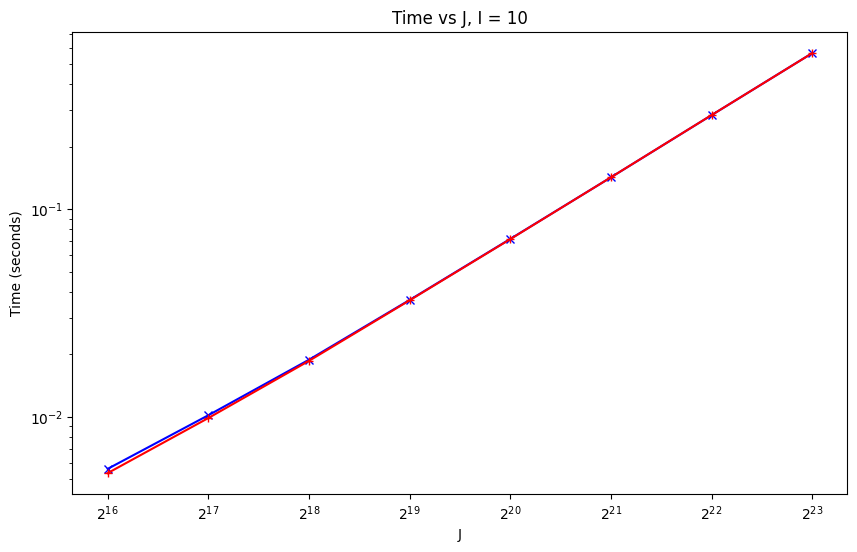

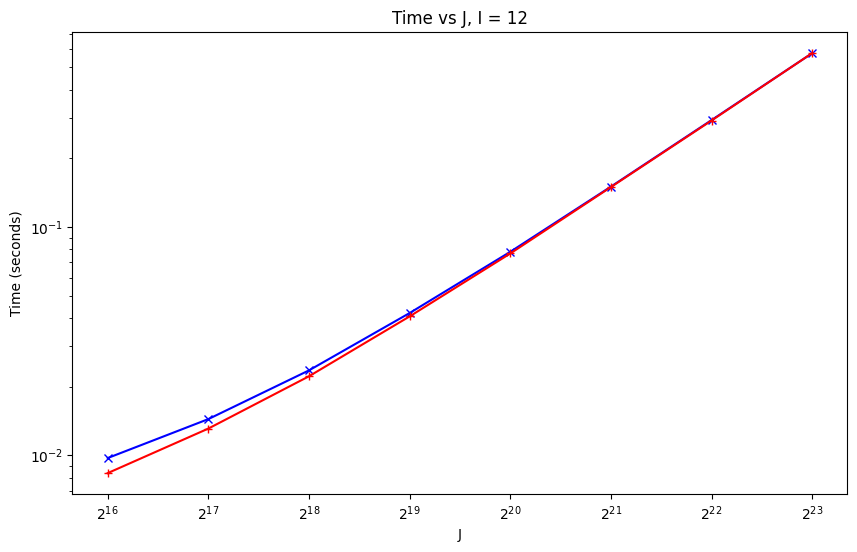

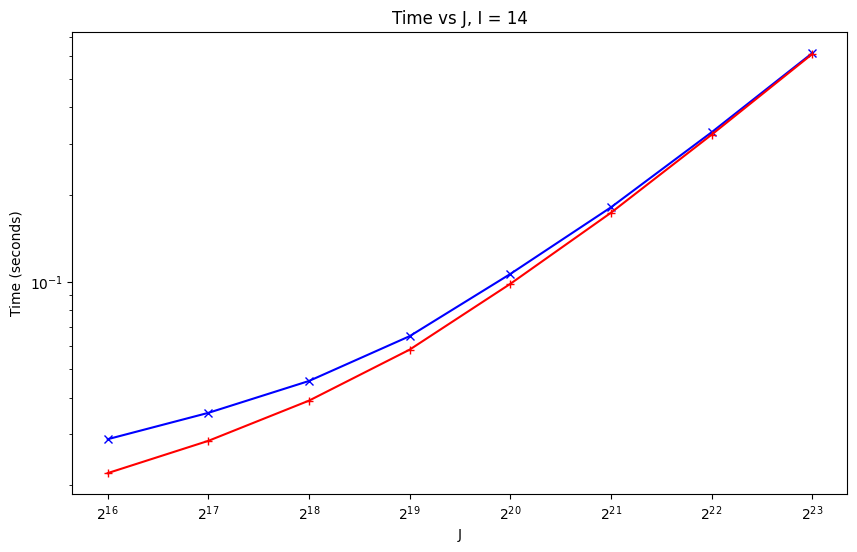

In [63]:
df : pd.DataFrame = pd.read_csv("results.csv")

df = df[df['J'] <= 23]
df = df.sort_values(by=['I', 'J'])

creation_times = df[df['Type'] == 'Graph'].drop(columns=['Type'])
bin_heap_times = df[df['Type'] == 'BinHeap'].drop(columns=['Type'])
fib_heap_times = df[df['Type'] == 'FibHeap'].drop(columns=['Type'])

df_cmp = df[df['Type'] != 'Graph']
graph_comp(df_cmp, 10)
graph_comp(df_cmp, 12)
graph_comp(df_cmp, 14)

FibHeap, I = 10
R^2: 0.9999057718775146
Ecuación: y = 6.710135041746936e-08x + 0.001417805581340914


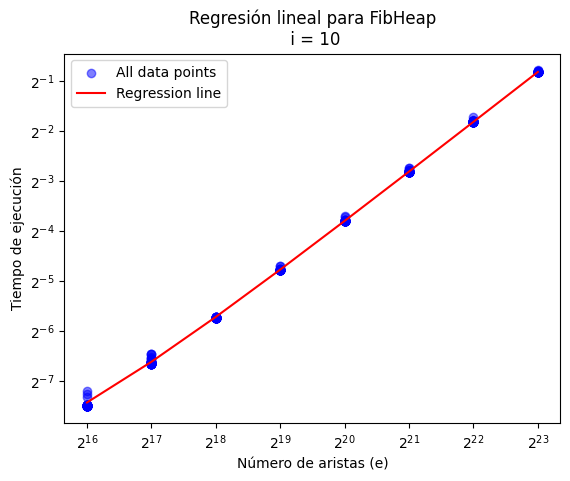

FibHeap, I = 12
R^2: 0.9998479691473279
Ecuación: y = 6.82813776903475e-08x + 0.006117689946424032


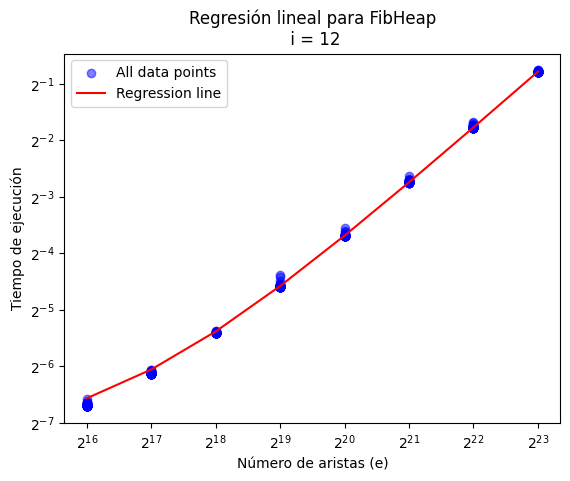

FibHeap, I = 14
R^2: 0.9989951845757991
Ecuación: y = 7.038907387745123e-08x + 0.028729592280416716


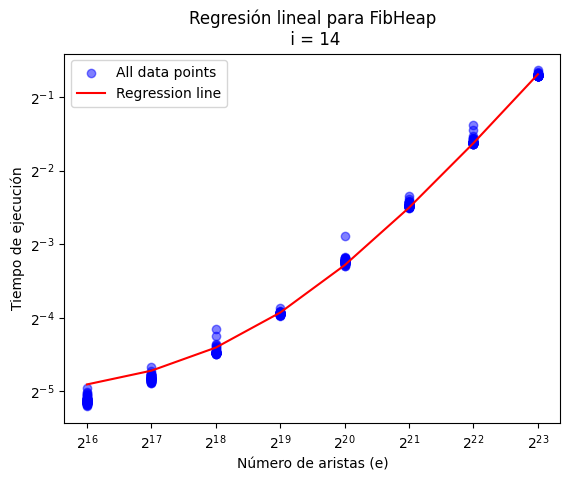

BinHeap, I = 10
R^2: 0.9999048073425745
Ecuación: y = 6.710199110780423e-08x + 0.0012443824019657268


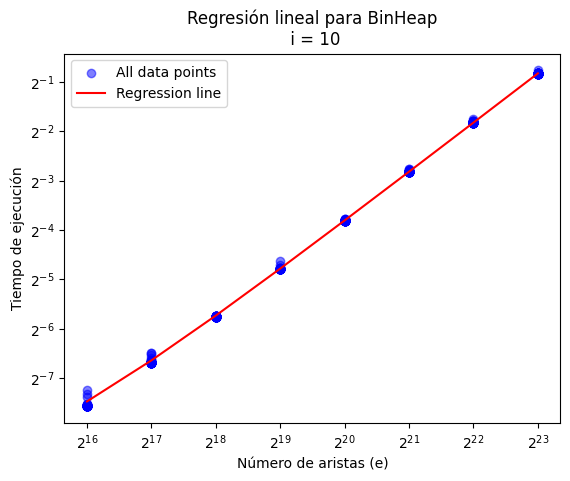

BinHeap, I = 12
R^2: 0.9998167432495568
Ecuación: y = 6.842644019759157e-08x + 0.004718980215497465


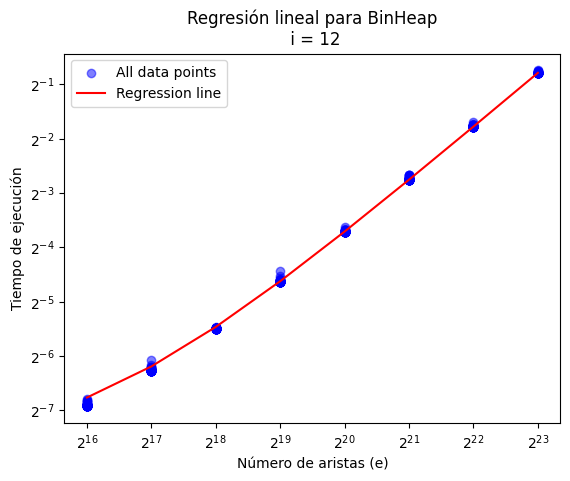

BinHeap, I = 14
R^2: 0.9992786292600756
Ecuación: y = 7.06668265400038e-08x + 0.021462386121098187


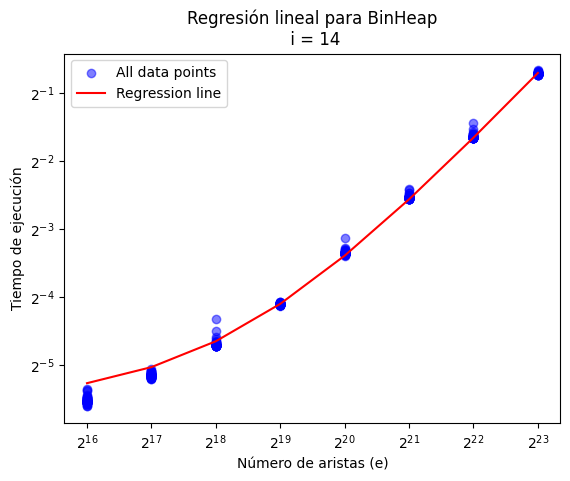

In [66]:
linear_regresion(df, 10, 'FibHeap')
linear_regresion(df, 12, 'FibHeap')
linear_regresion(df, 14, 'FibHeap')
linear_regresion(df, 10, 'BinHeap')
linear_regresion(df, 12, 'BinHeap')
linear_regresion(df, 14, 'BinHeap')